In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0) 
%matplotlib inline

In [4]:
training_data1_df = pd.read_csv("ZipDigits_traning.csv") # laod data from ZipDigits.training
                                                         # to do this step I firstly converted the file to csv file
training_data2_df = pd.read_csv("ZipDigits_test.csv")

training_data1_df.shape
training_data1_df = training_data1_df.astype(float)

training_data2_df.shape
training_data2_df = training_data2_df.astype(float)

In [5]:

#     filtered_training_data_1 = training_data1_df['1'] == 1.0  #filter data 1
#     filtered_training_data_5 = training_data1_df['1'] == 5.0 #filter data 5

#     training_data1_df_1 = training_data1_df[filtered_training_data_1]
#     training_data1_df_5 = training_data1_df[filtered_training_data_5]
#     print(training_data1_df_1)
#     print(training_data1_df_5)

#     frames = [training_data1_df_1,training_data1_df_5]
#     filtered_df = pd.concat(frames)                        #add two frames together
    

#     print(filtered_df)
def prepare(dataset):
        filtered_training_data_1 = dataset['1'] == 1.0  #filter data 1
        filtered_training_data_5 = dataset['1'] == 5.0 #filter data 5

        training_data1_df_1 = dataset[filtered_training_data_1]
        training_data1_df_5 = dataset[filtered_training_data_5]
        
        
        frames = [training_data1_df_1,training_data1_df_5]
        filtered_df = pd.concat(frames)   #add two frames together
        return filtered_df


In [6]:
filtered = prepare(training_data1_df)
filtered.index = np.arange(1, len(filtered) + 1) # reconstruct filtered data with correct index

filtered2 = prepare(training_data2_df)
filtered2.index = np.arange(1, len(filtered2) + 1)

data_set2 = filtered2.drop(columns=['1'])
numpy_data = data_set2.to_numpy()

# # for i in range(len(numpy_data)-1):
# #     image_data = np.reshape(data_set2[i],(16,16))
# a = np.reshape(data_set2[0],(16,16))
#     print(np.reshape(data_set2[0],(16,16)))

In [11]:

def get_dataset(data):
        data_set2 = data.drop(columns=['1'])
        numpy_data = data_set2.to_numpy()
        chcker = data.to_numpy()
        length = len(numpy_data)
        x1 = np.zeros(length)
        negetive = np.zeros(length)
        positive = np.zeros(length)# for indensity  in the dataframe -1 is white and 1 is black
        x2 = np.zeros(length) # for symmetry
        x3 = np.zeros(length)
        const = 16

        for i in range(length):
            for j in range(256):
                if(numpy_data[i][j] <= 0):
                    negetive[i]+= numpy_data[i][j] #intensity
                else:
                    positive[i]+= numpy_data[i][j]
            x1[i] = abs(negetive[i]/(abs(negetive[i])+positive[i]))
            
        for i in range(length):
            image_data = np.reshape(numpy_data[i],(16,16))
            for j in range(15):
                for x in range(7):
                    x2[i] += abs(image_data[j][x]-image_data[j][15-x])
                    
        for i in range(length):
            image_data = np.reshape(numpy_data[i],(16,16))
            for j in range(7):
                for x in range(15):
                    x3[i] += abs(image_data[j][x]-image_data[15-j][x])
                        
        for i in range(length):
            x2[i] = (x2[i]+x3[i])/200
                    
#                     if(j%16 > 0 and j%16 <= 9):
#                         if(numpy_data[i][j] == -1 or numpy_data[i][j] == 1):
#                             x2[i]+= numpy_data[i][j]
#                     if(j%16 == 0 or j%16 > 9):
#                         if(numpy_data[i][j] == -1 or numpy_data[i][j] == 1):
#                             x2[i]-= numpy_data[i][j]
#         for i in range(length):    # for the symmetry I decide to use the horizontal symmetry, when the value                              #is approch to zero mean
#             for j in range(const):
#                 if(j != 0):
#                     if(j < 129): 
#                         if(numpy_data[i][j] == -1 or numpy_data[i][j] == 1):
#                             x3[i]+= numpy_data[i][j]
#                     if(j >=129):
#                         if(numpy_data[i][j] == -1 or numpy_data[i][j] == 1):
#                             x3[i]-= numpy_data[i][j]
#         for i in range(length):
#             x2[i] = x2[i]+x3[i]
        Data_vector = np.array(list(zip(x1,x2)))
        return Data_vector , chcker

[[0.90442643 0.072335  ]
 [0.91412305 0.07174   ]
 [0.89998131 0.03587   ]
 ...
 [0.65817205 0.86165   ]
 [0.67327914 0.700815  ]
 [0.80077147 0.635765  ]]


Text(0.5, 0, 'intensity')

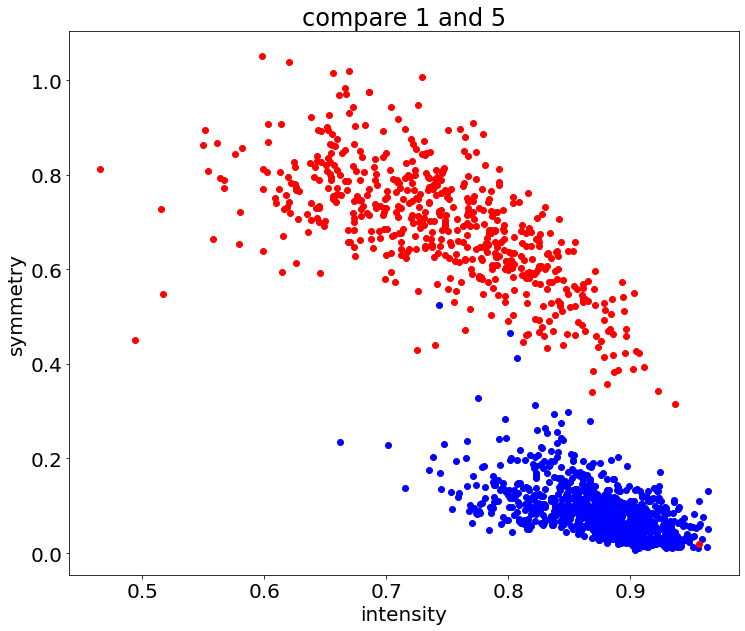

In [12]:
data_1, list_1 = get_dataset(filtered)
length = len(data_1)

print(data_1)
figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca(); #Get the current Axes instance on the current figure matching the given keyword args, or create one.
for i in range(length):
    if(list_1[i][0] == 1.0):
        plt.plot(data_1[i,0],data_1[i,1],'bo');
    else:
        plt.plot(data_1[i,0],data_1[i,1],'ro');

plt.title('compare 1 and 5')
plt.rcParams.update({'font.size': 20})
plt.ylabel('symmetry')
plt.xlabel('intensity')

Text(0.5, 0, 'symmetry')

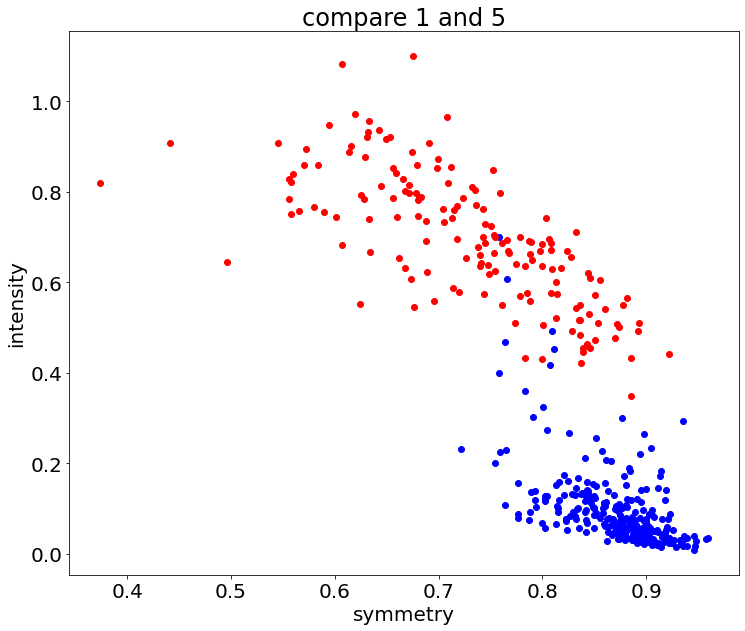

In [14]:
data_2, list_2 = get_dataset(filtered2)
length = len(data_2)

figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca(); #Get the current Axes instance on the current figure matching the given keyword args, or create one.
for i in range(length):
    if(list_2[i][0] == 1.0):
        plt.plot(data_2[i,0],data_2[i,1],'bo');
    else:
        plt.plot(data_2[i,0],data_2[i,1],'ro');

plt.title('compare 1 and 5')
plt.rcParams.update({'font.size': 20})
plt.ylabel('intensity')
plt.xlabel('symmetry')